# **Life cycle of machine learning Project**

* Undrstading the problem statment 
* Data collection
* Data checks to perform 
* Explotary data analysis 
* Data Pre-Processing 
* Model Trainer
* Choose te Best Model 


# **Problem Statment**
this project understands ho the student's performance (test score) is affcted by other variables <br> sach as gendermEthnicity,paranetal level of education, lunch and Test preparation course 

**Import data and packages**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline


C:\Users\akram\AppData\Local\Temp\ipykernel_6536\631829531.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Read the Data**

In [2]:
df = pd.read_csv('data/stud.csv')
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
35,male,group E,associate's degree,standard,completed,81,81,79
226,female,group C,some college,standard,none,72,72,71
220,female,group D,high school,standard,completed,56,68,74
599,female,group D,some high school,standard,none,65,82,81
316,female,group D,master's degree,standard,completed,77,82,91


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


we noticing that:<br>
* the mean of the numerical values are betwwn 66 to 68.
* the standard deviation std ais pretty mach the same between 14.5 - 15.9 
* the min in math score in 0

In [5]:
df.shape
# 1000 rows by 8 coloumns 

(1000, 8)

**1. Data columns  information**
* gender :  sex of student(male or female)
* race/ethincity : Group(A/B/C)
* Potancial degree: bach degree / maste / high school/association
* lunch :  having lunch before test( standard / reduced )
* math score 
* reading score 
* writhing score  

**2. Data check**
* check missing values 
* check duplicates 
* check data type 
* check the unique nmber of each value 
* check various categories present in diffrent categorical columns  

 **2.1 check missing values**

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

observation : <br>
the is no missing values 

**2.2 check duplicates**

In [7]:
df.duplicated().sum()

0

observation : <br>
the is no duplucation

In [8]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**2.3 check the unique values of each column**

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df['gender'].unique(),df['race_ethnicity'].unique(),df['parental_level_of_education'].unique(),df['lunch'].unique(),df['test_preparation_course'].unique()

(array(['female', 'male'], dtype=object),
 array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 array(['standard', 'free/reduced'], dtype=object),
 array(['none', 'completed'], dtype=object))

# **3. EDA**

In [12]:
df.sample(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
351,male,group E,some college,standard,none,66,57,52
342,female,group B,high school,standard,completed,69,76,74
117,female,group D,bachelor's degree,standard,none,78,82,79


In [13]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [14]:
categorical_feature =[feature for feature in df.columns if df[feature].dtype == "O"]
numerecial_feature = [feature for feature in df.columns if df[feature].dtype!= "O"]

In [15]:
print(f"number of categorical feature :{len(categorical_feature)}\ncontains the follwing:{categorical_feature}")
print(f"number of numerical feature :{len(numerecial_feature)}\ncontains the follwing:{numerecial_feature}")

number of categorical feature :5
contains the follwing:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
number of numerical feature :3
contains the follwing:['math_score', 'reading_score', 'writing_score']


In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Adding columns for Total score and Avrage**

In [17]:
df['Total_score']= df['math_score']+  df['reading_score']+df['writing_score']
df['Avrage'] = df['Total_score']/3 
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
df['Avrage'] = df['Avrage'].round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [19]:
full_math = df[df['math_score'] == 100]['Avrage'].count()
full_reading = df[df['reading_score'] == 100]['Avrage'].count()
full_writing = df[df['writing_score'] == 100]['Avrage'].count()


In [20]:
print("numbe of student who had the full mark in math: {}".format(full_math))
print("numbe of student who had the full mark in reading: {}".format(full_reading))
print("numbe of student who had the full mark in writing:{}".format(full_writing))

numbe of student who had the full mark in math: 7
numbe of student who had the full mark in reading: 17
numbe of student who had the full mark in writing:14


In [21]:
less20_math = df[df['math_score'] <= 20]['Avrage'].count()
less20_reading = df[df['reading_score'] <= 20]['Avrage'].count()
less20_writing = df[df['writing_score'] <= 20]['Avrage'].count()

In [22]:
print("numbe of student who had the less or equal 20 mark in math: {}".format(less20_math))
print("numbe of student who had the less or equal 20 mark in reading: {}".format(less20_reading))
print("numbe of student who had the less or equal 20 mark in writing:{}".format(less20_writing))

numbe of student who had the less or equal 20 mark in math: 4
numbe of student who had the less or equal 20 mark in reading: 1
numbe of student who had the less or equal 20 mark in writing:3


we notice that :<br>
* the student who perfomed the worst are in math section
* best performance are in reading section 

# **EDA With visualization**

* Histogram
* kernal distribution (KDE) 

In [23]:
df.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
970,female,group D,bachelor's degree,standard,none,89,100,100,289,96.33
119,female,group C,some college,standard,none,55,69,65,189,63.00


Text(0.5, 1.0, 'distrubtion of Avrage score for the twoo genders')

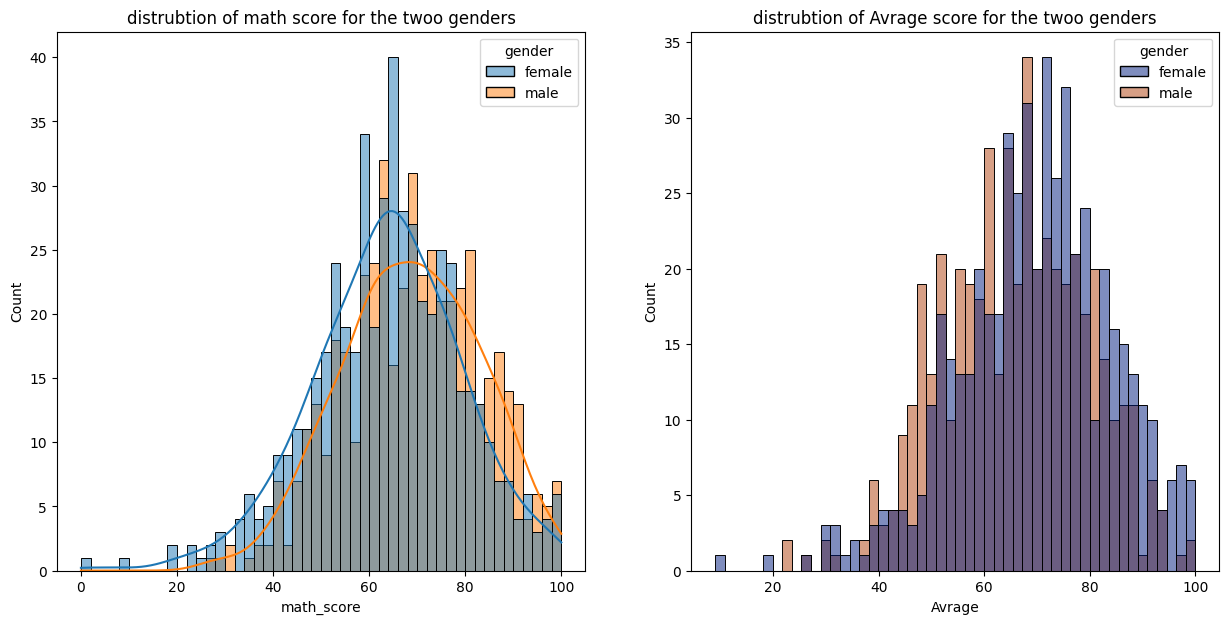

In [24]:
fig,axe = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='math_score',bins=50,kde=True,hue='gender')
plt.title('distrubtion of math score for the twoo genders' )
plt.subplot(122)
sns.histplot(data=df,x='Avrage',bins=50,hue='gender',palette='dark')
plt.title('distrubtion of Avrage score for the twoo genders')


* Female student tend to perform bettre the the student in general
* other wise in math section men are performing bettre

In [25]:
df.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
678,male,group D,associate's degree,free/reduced,none,81,75,78,234,78.0


Text(0.5, 1.0, 'Distrbution of female Avrage marks for the test preparation ')

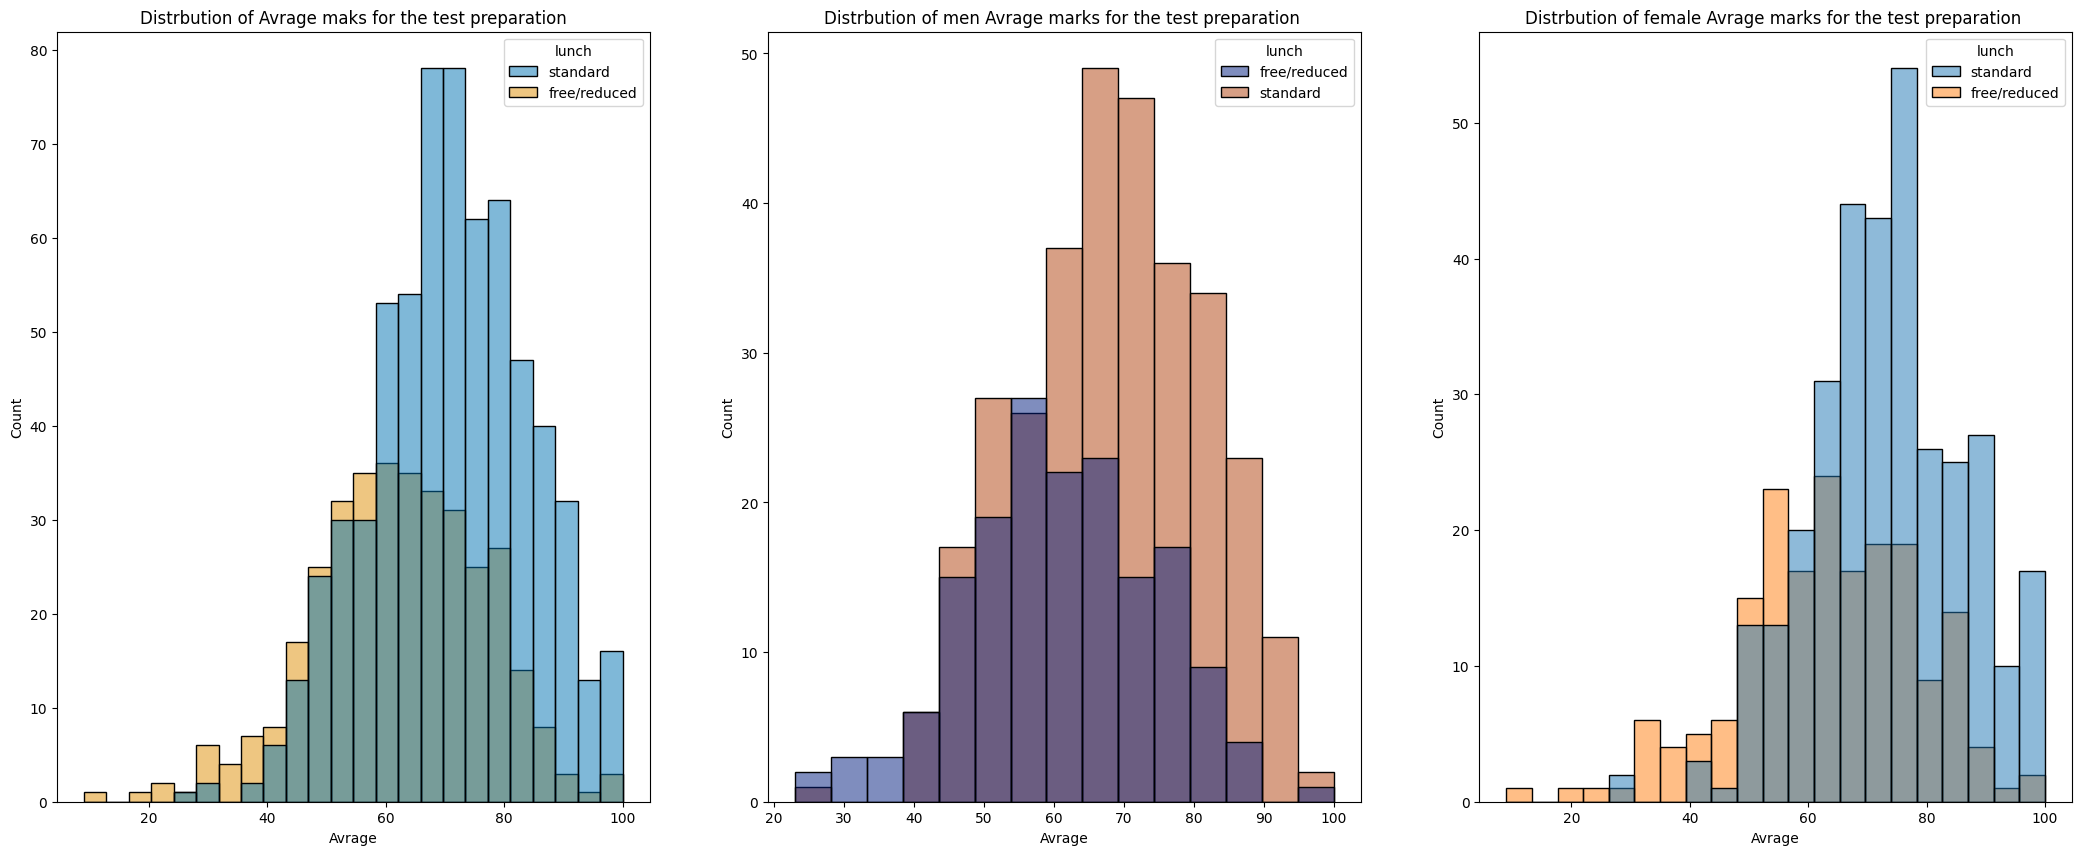

In [26]:
#avrage for the test preperation 

fig,axe = plt.subplots(1,3,figsize =(26,10))
plt.subplot(131)
sns.histplot(data=df,x ='Avrage',hue='lunch',palette='colorblind')
plt.title('Distrbution of Avrage maks for the test preparation')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'male'],x ='Avrage',hue='lunch',palette='dark')
plt.title('Distrbution of men Avrage marks for the test preparation ')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'female'],x ='Avrage',hue='lunch')
plt.title('Distrbution of female Avrage marks for the test preparation ')


we notice that : 
* the lunch (standard) has a positive coroletion wuth the avrage marks 
* the standard lunch helps perform well on exasms both for male and female 

Text(0.5, 1.0, 'parent level of education for female')

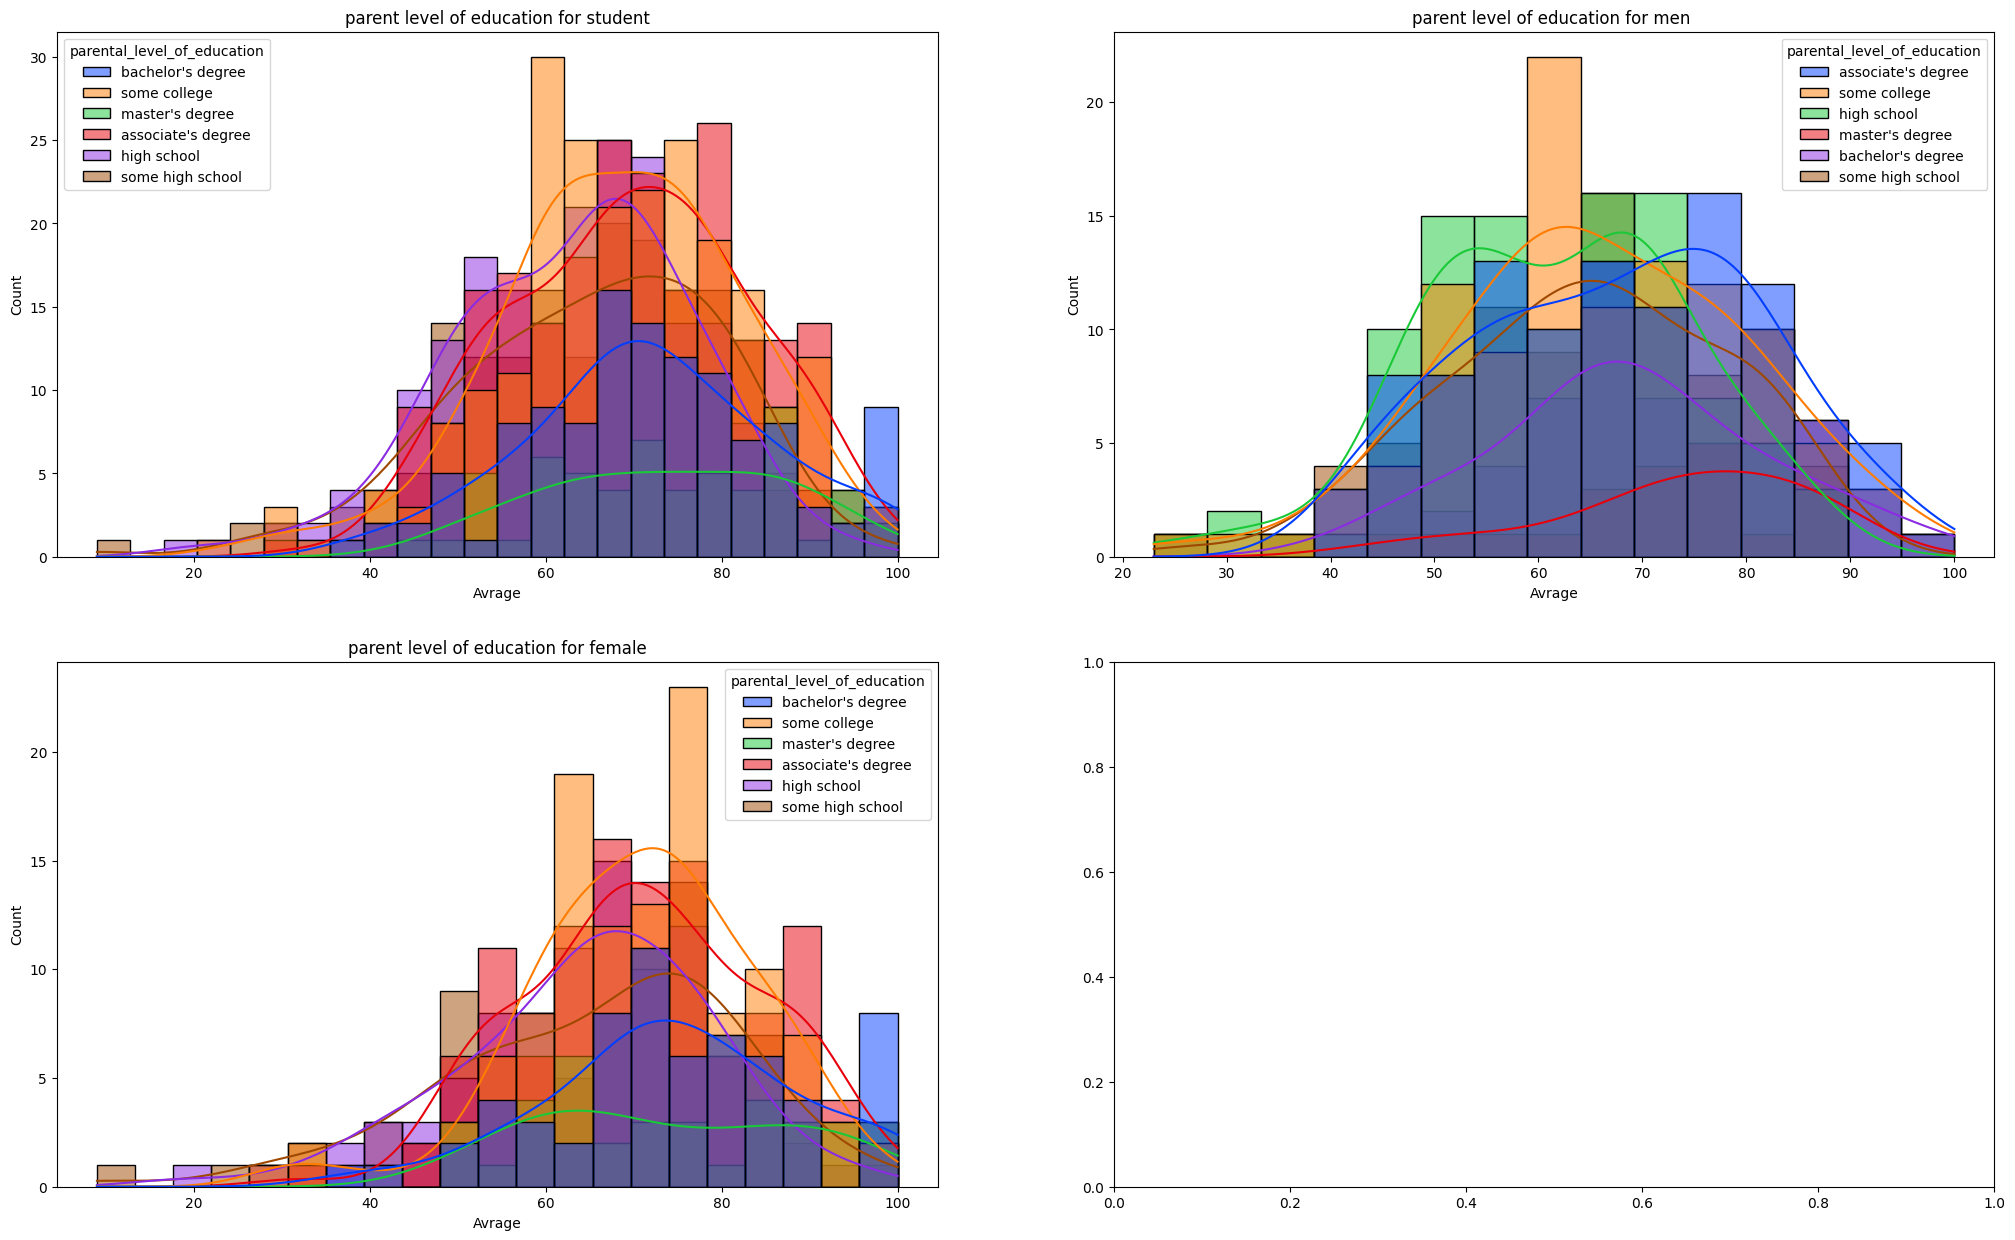

In [27]:
### Avrage for parents level of education 
fig,axe = plt.subplots(2,2,figsize=(25,15))
plot = sns.histplot(ax = axe[0,0],data=df, x = "Avrage",kde=True,hue='parental_level_of_education',palette='bright')
plot.set_title("parent level of education for student")


plot1 = sns.histplot(ax = axe[0,1],data=df[df['gender'] == 'male'], x ="Avrage",kde=True,hue='parental_level_of_education',palette='bright')
plot1.set_title("parent level of education for men ")


plot2 = sns.histplot(ax = axe[1,0],data=df[df['gender'] == 'female'], x ="Avrage",hue='parental_level_of_education',kde = True,palette='bright')
#plot1.set_xticklabels(plot.get_xticklabels(),rotation = 25)
plot2.set_title("parent level of education for female")
                 




Observation : 
* parent level of education has not that importance in related to the student performnce
* for the male plot we see that parent with bachlor's and associate degre their chieldren perform well 
* for female the parent education not relevent to student performance 

In [28]:
df.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
711,female,group E,some high school,standard,completed,80,85,85,250,83.33
910,male,group D,bachelor's degree,free/reduced,none,50,42,48,140,46.67


Text(0.5, 1.0, 'race ethnicity for female')

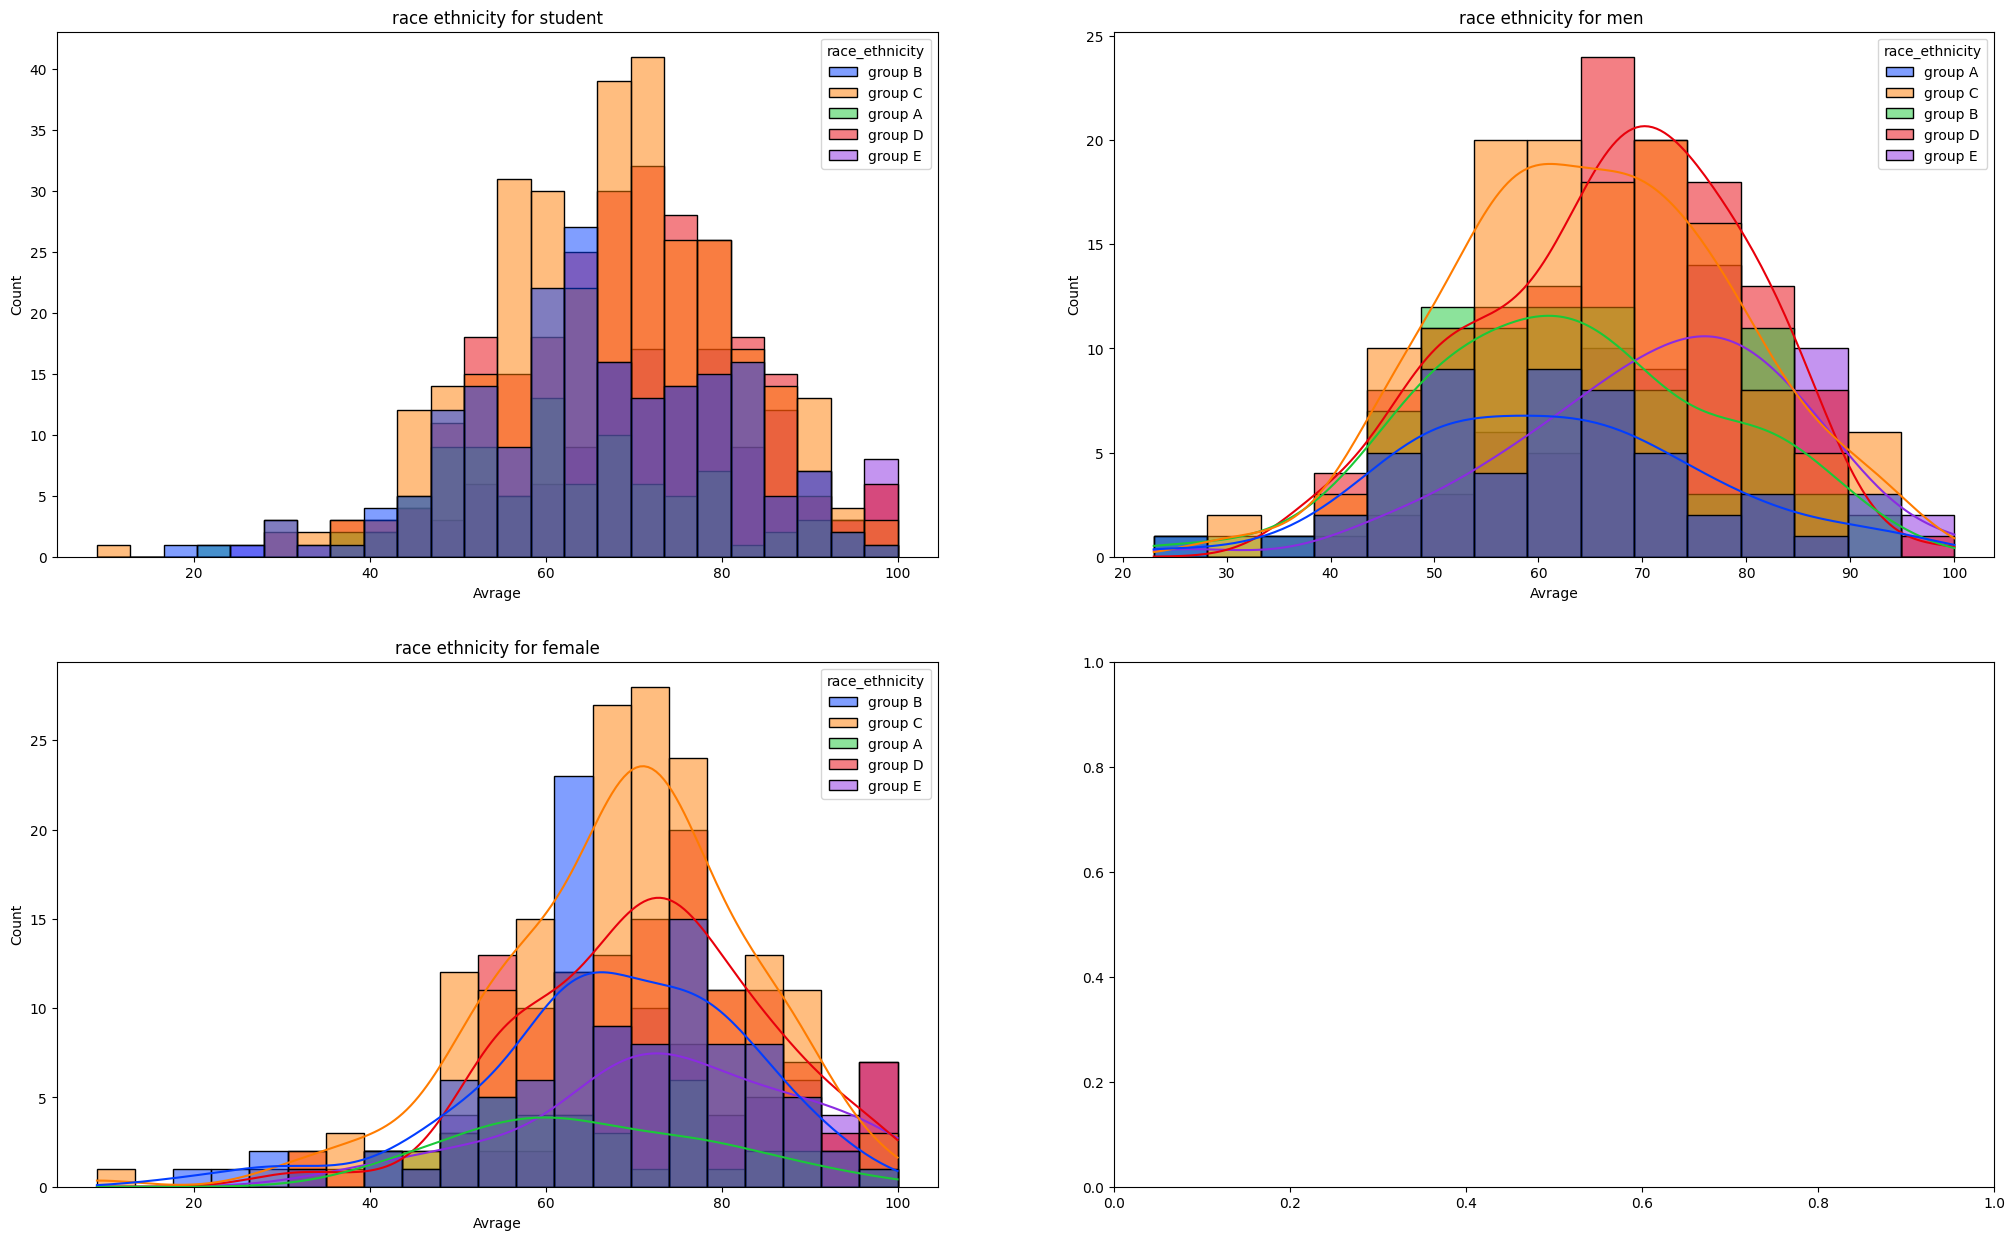

In [29]:
#Avrage marks for race enthncity
fig,axe = plt.subplots(2,2,figsize=(25,15))
plot = sns.histplot(ax = axe[0,0],data=df, x = "Avrage",hue='race_ethnicity',palette='bright')
plot.set_title("race ethnicity for student")


plot1 = sns.histplot(ax = axe[0,1],data=df[df['gender'] == 'male'], x ="Avrage",kde=True,hue='race_ethnicity',palette='bright')
plot1.set_title("race ethnicity for men ")


plot2 = sns.histplot(ax = axe[1,0],data=df[df['gender'] == 'female'], x ="Avrage",hue='race_ethnicity',kde = True,palette='bright')
#plot1.set_xticklabels(plot.get_xticklabels(),rotation = 25)
plot2.set_title("race ethnicity for female")

Observation: 
* we see that Group D and E perform well in exams for the men student 
* other wise Group B perform vey badly in exams for both males and females

**Maximum score of student in all subjects**

<Axes: ylabel='writing_score'>

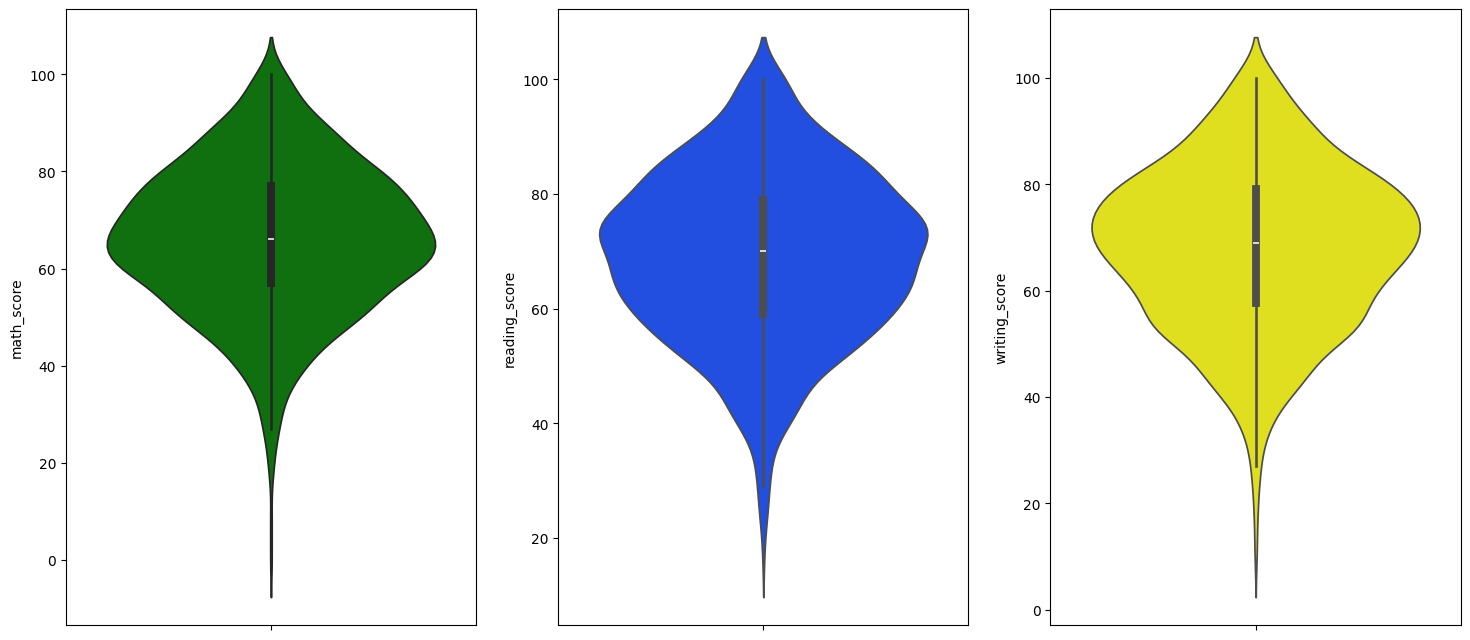

In [30]:
fig,axe = plt.subplots(1,3,figsize=(18,8))

sns.violinplot(ax=axe[0] ,data=df,y='math_score',color='green')

sns.violinplot(ax=axe[1] ,data=df,y='reading_score',palette='bright')

sns.violinplot(ax=axe[2] ,data=df,y='writing_score',color='yellow')



Obeservation : 
* its cleary visible that in math suject most of the studen scoe between 60-80 otherwise at <br> reading and writing subjects the student score between 50 -80 
 

# **Multivirante analysis using pieplot**

In [31]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [32]:
df.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
388,female,group D,high school,standard,none,62,64,64,190,63.33


Text(0.5, 1.0, 'Test Prepration Course')

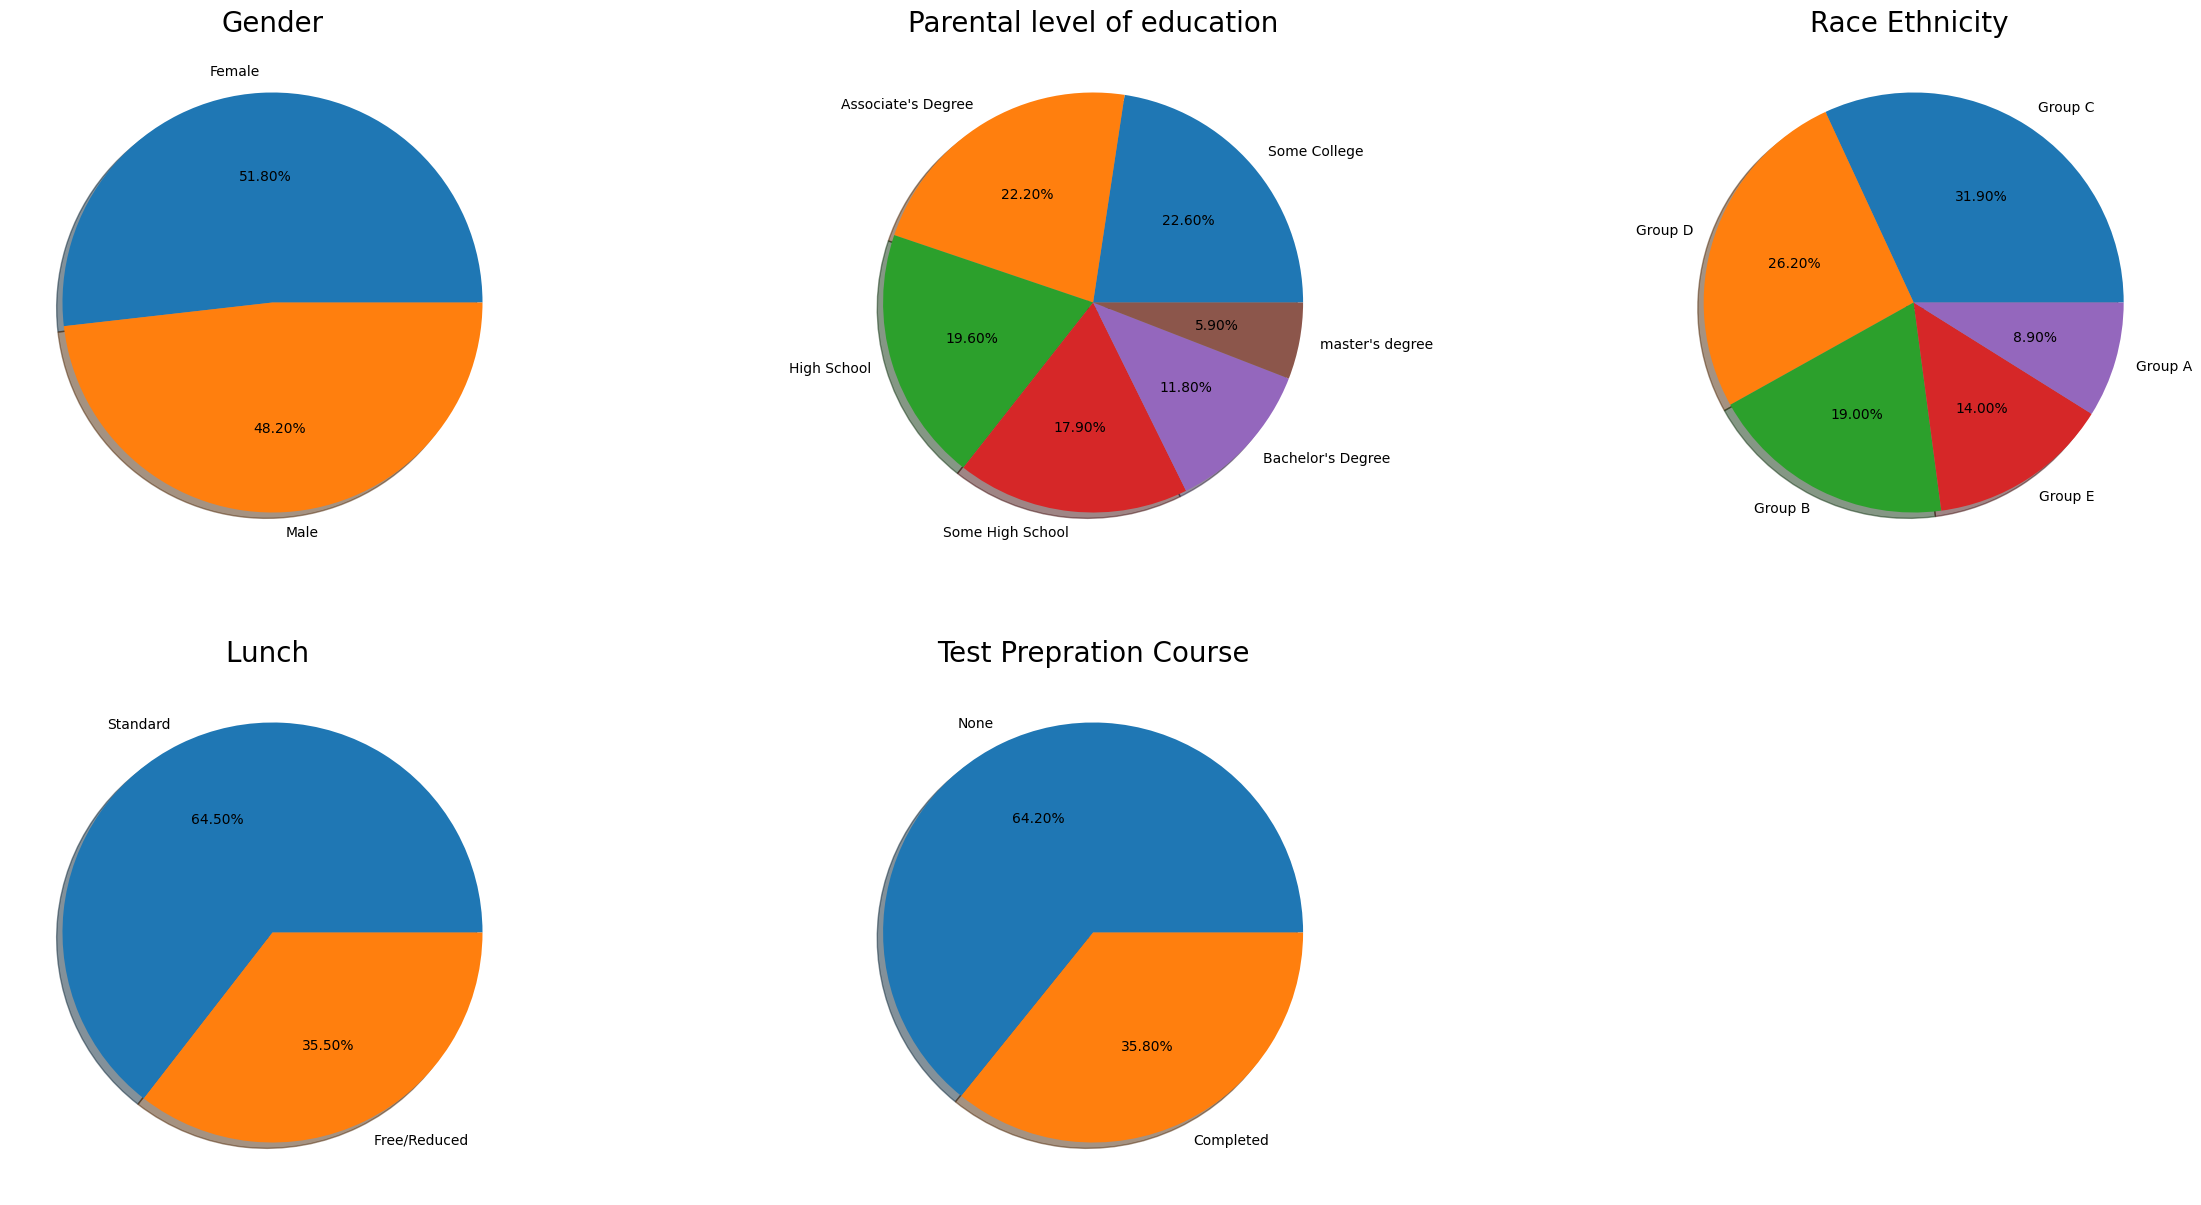

In [48]:
plt.rcParams['figure.figsize'] = (30,15)
plt.subplot(2,3,1)
plt.pie(x= df['gender'].value_counts(),labels=['Female','Male'],autopct='%.2f%%',shadow=True)
plt.title('Gender',fontsize = 20)


plt.subplot(2,3,2) 
plt.pie(x= df['parental_level_of_education'].value_counts(),shadow=True ,labels=['Some College','Associate\'s Degree','High School','Some High School','Bachelor\'s Degree','master\'s degree'],autopct='%.2f%%')
plt.title('Parental level of education',fontsize = 20)

plt.subplot(2,3,3)
plt.pie(x= df['race_ethnicity'].value_counts(),labels=['Group C','Group D','Group B','Group E','Group A'],autopct='%.2f%%',shadow=True)
plt.title('Race Ethnicity ',fontsize = 20)

plt.subplot(2,3,4)
plt.pie(x= df['lunch'].value_counts(),labels=['Standard','Free/Reduced '],autopct='%.2f%%',shadow=True)
plt.title('Lunch ',fontsize = 20)

plt.subplot(2,3,5)
plt.pie(x= df['test_preparation_course'].value_counts(),labels=['None','Completed'],autopct='%.2f%%',shadow=True)
plt.title('Test Prepration Course',fontsize = 20)


Observation : 
* numbers of sudents male and female are almost equal 
* number of students whose parental level education is "Some Collge "is greater followed by "High school"
* number of student whose not enrolled in any test preperation is greateer 
* number of stuent whose have standard lunch is greater 

# **Univariante analysis (How is distribution of Gender)** 

Text(0.5, 1.0, 'Student Performance by Gender')

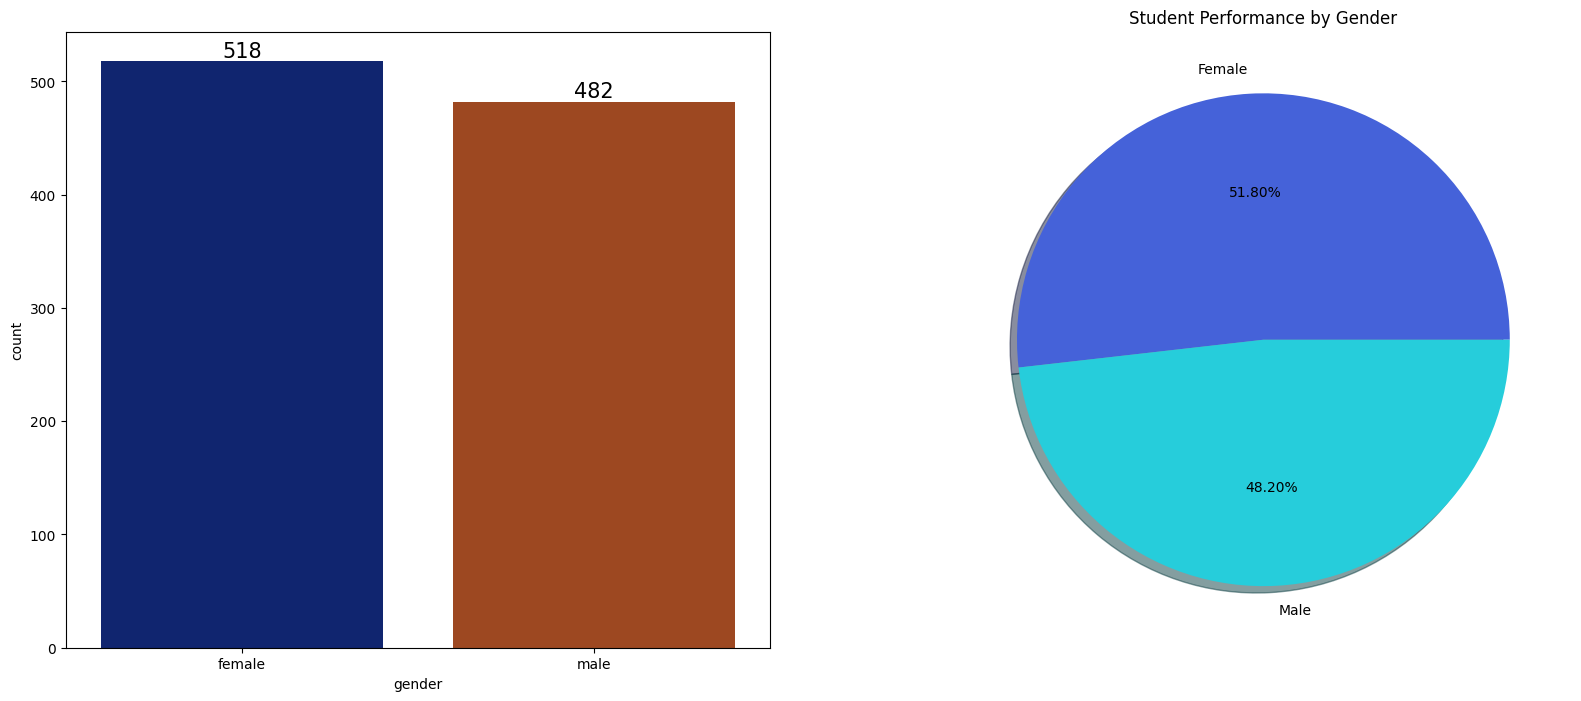

In [47]:
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.countplot(data=df,x ='gender',palette='dark',ax=ax[0])
for container in ax[0].containers: 
    ax[0].bar_label(container,color = 'black',size = 15)


plt.pie(x = df['gender'].value_counts(),labels=['Female','Male'],autopct='%.2f%%',colors=['#4562D9','#26CDDB'],shadow=True)
plt.title('Student Performance by Gender')


observation: 
* Gender is balanced between male and female 

# **Bivarite Analysis ( is gender has any impacts on student performance?)**

In [113]:
df = df.reindex(columns=['race_ethnicity','parental_level_of_education','lunch','test_preparation_course','gender','math_score','reading_score','writing_score','Total_score','Avrage'])

In [121]:
df.iloc[:,4:].groupby(by='gender').aggregate(['mean']).round(2)

,math_score,reading_score,writing_score,Total_score,Avrage
,mean,mean,mean,mean,mean
gender,,,,,
female,63.63,72.61,72.47,208.71,69.57
male,68.73,65.47,63.31,197.51,65.84


In [108]:
df.iloc[:,:]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33
